Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "chapters", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0
6,163.83,62.9926,35.0,1
7,149.225,38.2435,32.0,0
8,168.91,55.48,27.0,1
9,147.955,34.8699,19.0,0


Define the Stan language model

In [5]:
heightsmodel = "
// Inferring a Rate
data {
  int N;
  real<lower=0> h[N];
}
parameters {
  real<lower=0> sigma;
  real<lower=0,upper=250> mu;
}
model {
  // Priors for mu and sigma
  mu ~ uniform(100, 250);
  sigma ~ cauchy( 0 , 1 );

  // Observed heights
  h ~ normal(mu, sigma);
}
";

Define the Stanmodel and set the output format to :mcmcchain.

In [6]:
stanmodel = Stanmodel(name="heights", monitors = ["mu", "sigma"],model=heightsmodel,
  output_format=:mcmcchain);
# Input data for cmdstan
heightsdata = [
  Dict("N" => length(df2[:height]), "h" => df2[:height])
];

=====> /Users/rob/.julia/dev/StatisticalRethinking/chapters/04


File /Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/heights.stan will be updated.



Sample using cmdstan

In [7]:
rc, chn, cnames = stan(stanmodel, heightsdata, ProjDir, diagnostics=false,
  CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)



--- Translating Stan model to C++ code ---
bin/stanc  /Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/heights.stan --o=/Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/heights.hpp
Model name=heights_model
Input file=/Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/heights.stan
Output file=/Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/heights.hpp

--- Linking C++ model ---
clang++ -Wall -I . -isystem stan/lib/stan_math/lib/eigen_3.3.3 -isystem stan/lib/stan_math/lib/boost_1.66.0 -isystem stan/lib/stan_math/lib/sundials_3.1.0/include -std=c++1y -DBOOST_RESULT_OF_USE_TR1 -DBOOST_NO_DECLTYPE -DBOOST_DISABLE_ASSERTS -DBOOST_PHOENIX_NO_VARIADIC_EXPRESSION -Wno-unused-function -Wno-uninitialized -I src -isystem stan/src -isystem stan/lib/stan_math/ -DFUSION_MAX_VECTOR_SIZE=12 -Wno-unused-local-typedefs -DEIGEN_NO_DEBUG -DNO_FPRINTF_OUTPUT -pipe   src/cmdstan/main.cpp  -O3 -o /Users/rob/.julia/dev/StatisticalRethinking/chapters/04/tmp/heights -

Compare with previous result

In [8]:
clip_07s_example_output = "

Samples were drawn using hmc with nuts.
For each parameter, N_Eff is a crude measure of effective sample size,
and R_hat is the potential scale reduction factor on split chains (at
convergence, R_hat=1).

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
          Mean        SD      Naive SE      MCSE      ESS
sigma   7.7641718 0.3055115 0.004830561 0.0047596714 1000
   mu 154.6042417 0.4158242 0.006574758 0.0068304868 1000

Quantiles:
         2.5%       25.0%       50.0%      75.0%      97.5%
sigma   7.198721   7.5573575   7.749435   7.960795   8.393317
   mu 153.795975 154.3307500 154.610000 154.884000 155.391050

";

Plot the density of posterior draws

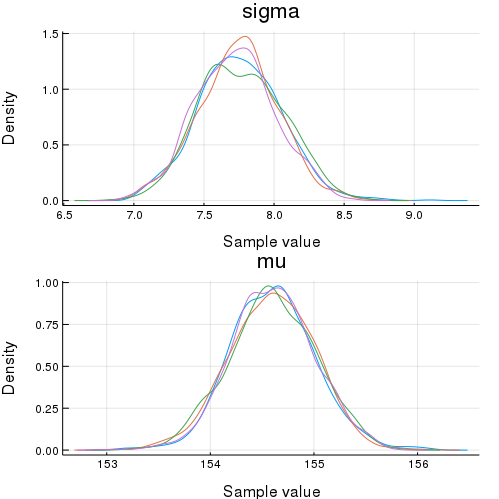

In [9]:
density(chn, xlab="height [cm]", ylab="density")

End of `clip_07.1s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*